# 如何使用Python擬合資料?

## 參考資料

* <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html" target="_blank">numpy.polyfit</a>
* <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html" target="_blank">scipy.optimize.curve_fit</a>, <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html" target="_blank">scipy.optimize.least_squares</a>
* <a href="http://docs.astropy.org/en/stable/modeling/index.html" target="_blank">astropy.modeling</a> 

## 準備工作：範例所需檔案下載及說明

* O-C_ephemeris.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)


* pulse-profile.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)


* QSOnumber.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)
  

* 其他範例檔案(待補)


## 範例1：以NumPy的多項式曲線擬合O-C ephemeris

In [1]:
from astropy.io import ascii
import numpy as np
oc_ephemeris = ascii.read('../files4examples/O-C_ephemeris.txt', names=['cycles', 'delay', 'error'])
cycles = oc_ephemeris['cycles']
delay = oc_ephemeris['delay']
error = oc_ephemeris['error']

* <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html" target="_blank">polyfit</a>為NumPy中以多項式曲線來擬合資料的函式，回傳值為多項式的係數。 <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html" target="_blank">poly1d</a>為NumPy中用來產生多項式物件的類別。

In [2]:
p2 = np.poly1d(np.polyfit(cycles, delay, 2))
p3 = np.poly1d(np.polyfit(cycles, delay, 3))
x = np.linspace(-10000, 50000, 100)

<IPython.core.display.Javascript object>


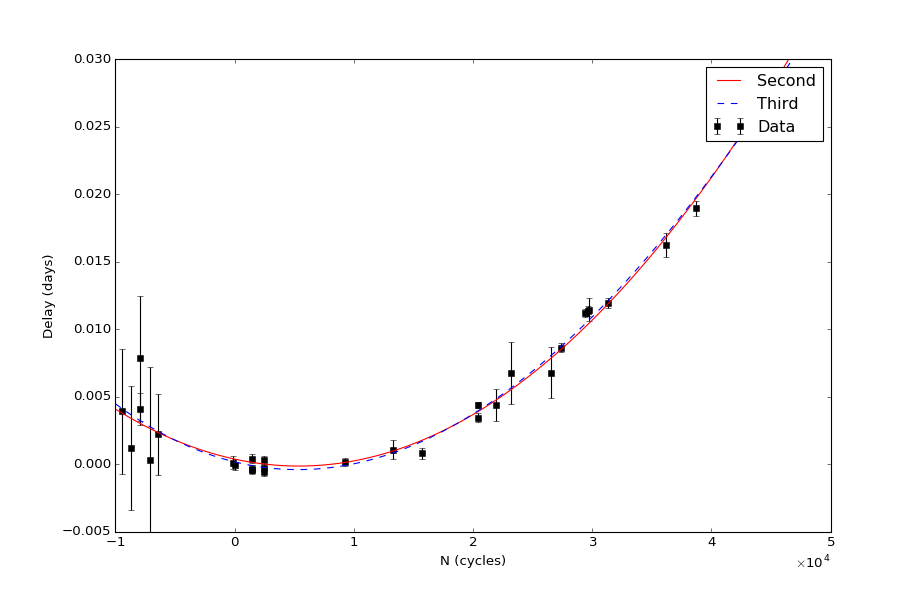

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(cycles, delay, yerr=error, fmt='sk')
plt.hold(True)
plt.plot(x, p2(x), 'r-')
plt.plot(x, p3(x), '--')
plt.hold(False)
plt.ylim(-0.005, 0.03)
plt.legend(('Second', 'Third', 'Data'))
plt.xlabel('N (cycles)')
plt.ylabel('Delay (days)')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.show()

## 範例2：以SciPy的curve_fit來擬合pulse-profile

In [4]:
from astropy.io import ascii
import numpy as np
pulse_profile = ascii.read('../files4examples/pulse-profile.txt', names=['phase', 'rate', 'error'])
phase = pulse_profile['phase']
rate =pulse_profile['rate']
error = pulse_profile['error']

In [5]:
from scipy.optimize import curve_fit
import numpy as np

# 定義模型
def model(x, a0, a1):
    return a0 + a1 * np.cos(2 * np.pi * x)
# def model(x, a0, a1, a2):
#     return a0 + a1 * np.cos(2 * np.pi * x) +  a2 * np.sin(2 * np.pi * x)

# 曲線擬合
popt, pcov = curve_fit(model, phase, rate, sigma=error)
perr = np.sqrt(np.diag(pcov))
print(popt)
print(pcov)
print("a0 =", popt[0], "+/-", perr[0])
print("a1 =", popt[1], "+/-", perr[1])
#print("a2 =", popt[2], "+/-", perr[2])

[ 88.89003174   2.10941611]
[[ 0.06380479  0.00151413]
 [ 0.00151413  0.12805662]]
a0 = 88.8900317425 +/- 0.252596107331
a1 = 2.10941610773 +/- 0.357849998012


<IPython.core.display.Javascript object>


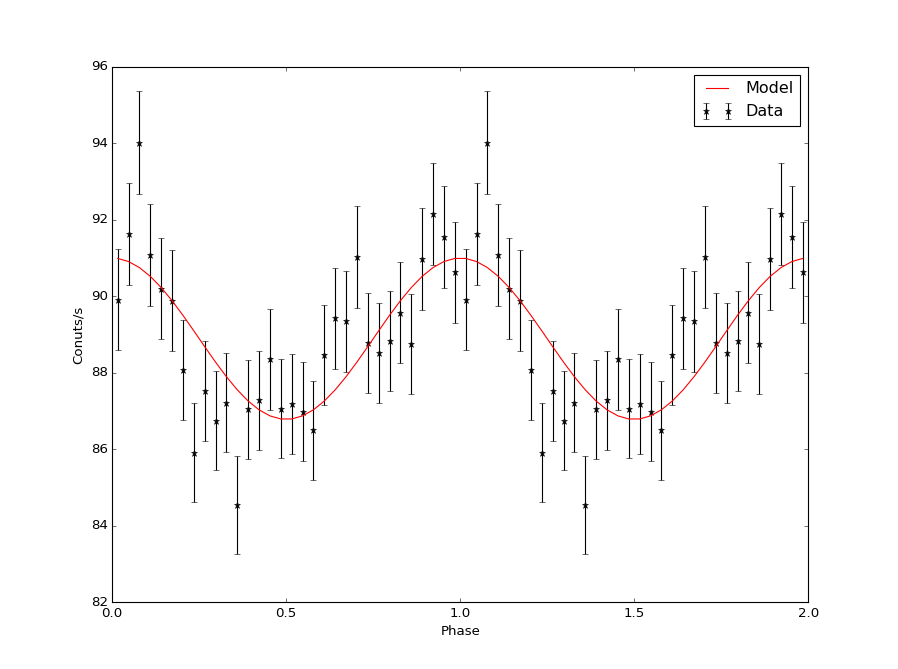

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
phase2 =  np.append(phase, phase + 1)
rate2 = np.append(rate, rate)
error2 = np.append(error, error)
plt.figure()
plt.errorbar(phase2, rate2, yerr=error2, fmt="*k", label='Data')
plt.hold(True)
plt.plot(phase2, model(phase2, popt[0], popt[1]), 'r-', label='Model')
plt.hold(False)
#plt.plot(phase2, model(phase2, popt[0], popt[1], popt[2]), 'r-', label='Model')
plt.xlabel('Phase')
plt.ylabel('Conuts/s')
plt.legend()
plt.show()

## 範例3：以Astropy的一維高斯曲線擬合QSO數量分佈

In [7]:
from astropy.io import ascii
import numpy as np
from astropy.modeling import models as mo, fitting as fit
data = ascii.read('../files4examples/QSOnumber.txt')
x = data['x']
y = data['y']

In [8]:
model_init = mo.Gaussian1D(amplitude=4220, mean=-0.25, stddev=0.1)
fitter = fit.LevMarLSQFitter()
fit_res = fitter(model_init, x, y)
print(fit_res.amplitude)
print(fit_res.mean)
print(fit_res.stddev)

Parameter('amplitude', value=4078.8970040617974)
Parameter('mean', value=-0.17176406050119747)
Parameter('stddev', value=0.045674628679433164)


<IPython.core.display.Javascript object>


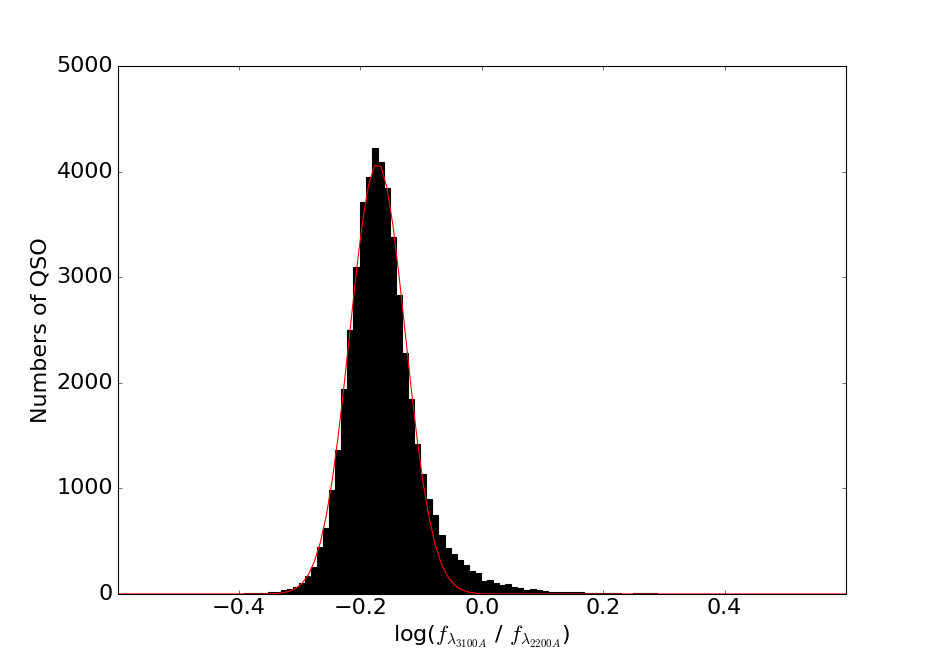

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(x, y, '.k')
plt.bar(x, y, width=x[1]-x[0], align='center', color='black')
plt.hold(True)
plt.plot(x, fit_res(x), 'r')
plt.hold(False)
plt.xlim(-0.6, 0.6)
plt.ylim(0, 5000)
plt.xlabel('log($f_{\lambda_{3100A}}$ / $f_{\lambda_{2200A}}$)', fontsize=20)
plt.ylabel('Numbers of QSO', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xticks(np.arange(-0.4,0.5,0.2), fontsize=20)
plt.show()